In [6]:
import large_image
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'

# Import and alias positive_pixel_count
import histomicstk.segmentation.positive_pixel_count as ppc


Input image


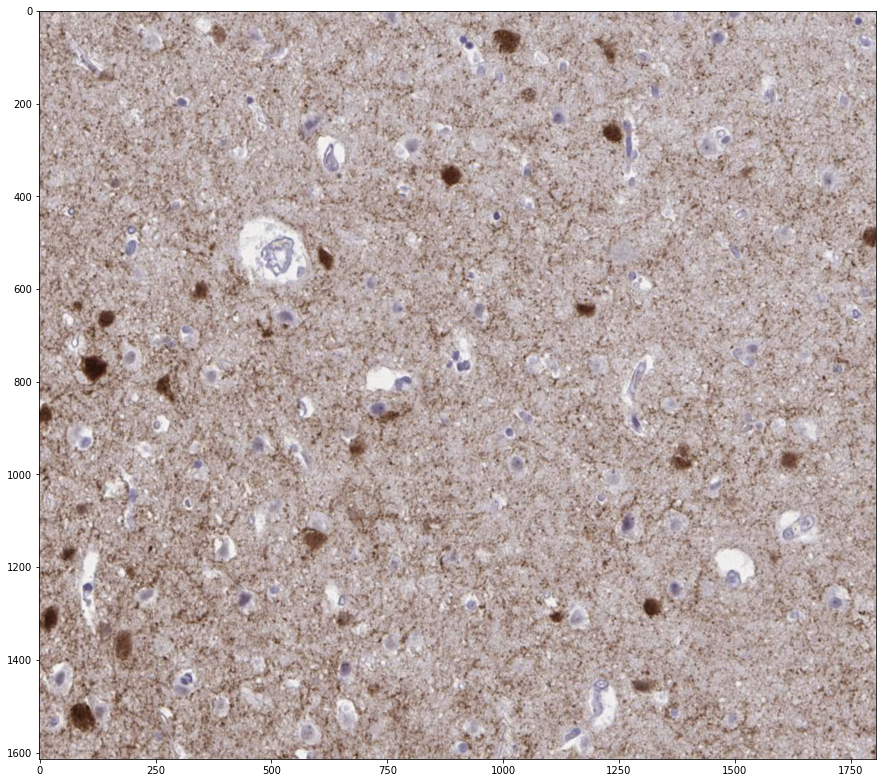

In [7]:
image_path = "git_repo/histo/gad1_screenshot_ENSG00000128683-GAD1.png"

im_input = skimage.io.imread(image_path)

print('Input image')
plt.imshow(im_input)
plt.show()


In [8]:
def count_and_label(params):
    "Compute the label image with count_image, and then display it"
    label_image = ppc.count_image(im_input, params)[1]
    plt.imshow(label_image)
    plt.show()


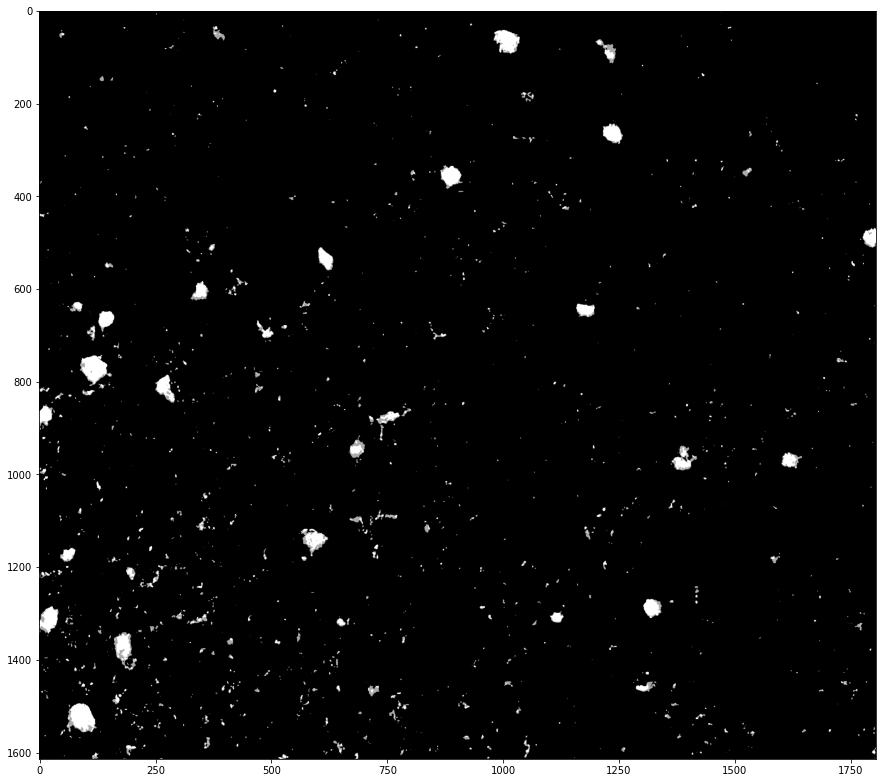

In [21]:
template_params = ppc.Parameters(
    hue_value=0.05,
    hue_width=0.15,
    saturation_minimum=0.15,
    intensity_upper_limit=0.95,
    intensity_weak_threshold=0.65,
    intensity_strong_threshold=0.35,
    intensity_lower_limit=0.05,
)
count_and_label(template_params)


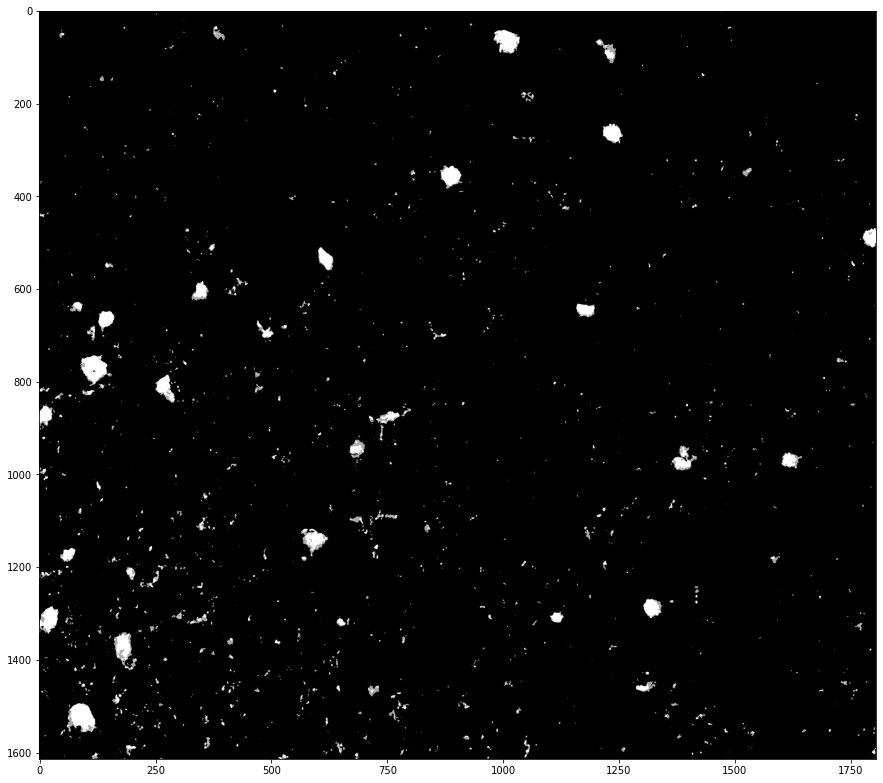

In [22]:
count_and_label(template_params._replace(hue_value=0.))


In [23]:
stats, label_image = ppc.count_image(im_input, template_params)

def pp_namedtuple(t):
    "Pretty-print a namedtuple by printing each field on its own line and left-aligning all values"
    print(type(t).__name__)
    maxlen = max(map(len, t._fields))
    for f in t._fields:
        print(f, getattr(t, f), sep=':' + ' ' * (maxlen - len(f)) + '\t')

pp_namedtuple(stats)


Output
NumberWeakPositive:             	0
NumberPositive:                 	24728
NumberStrongPositive:           	30960
IntensitySumWeakPositive:       	0.0
IntensitySumPositive:           	10262.88366013072
IntensitySumStrongPositive:     	8044.30588235294
IntensityAverage:               	0.328745682058678
RatioStrongToTotal:             	0.5559546042235312
IntensityAverageWeakAndPositive:	0.41503088240580394
